# **COMPETENCIA SPACE TITANIC**

Este notebook recopila la informacion de un viaje interestelar a traves del espacio-tiempo, donde a traves de análisis de datos vamos a extraer información importante para predecir que personas sufrieron transportación a un dimension alterna.

In [1]:
# IMPORT MANIPULATION DATA LIBRARY
import pandas as pd
import numpy as np

# IMPORT DATA VISUALIZATION LIBRARY
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# IMPORT MACHINE LEARNING LIBRARY
from sklearn.model_selection import train_test_split, GridSearchCV , cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier

# OTHERS LIBRARYS
import warnings
warnings.simplefilter("ignore")

In [15]:
# LOAD DATASET
data = pd.read_csv("train.csv")
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [16]:
# TYPE
for i in data.columns:
    print(f'Column: {i} || Data Type : {data[i].dtype}')

Column: PassengerId || Data Type : object
Column: HomePlanet || Data Type : object
Column: CryoSleep || Data Type : object
Column: Cabin || Data Type : object
Column: Destination || Data Type : object
Column: Age || Data Type : float64
Column: VIP || Data Type : object
Column: RoomService || Data Type : float64
Column: FoodCourt || Data Type : float64
Column: ShoppingMall || Data Type : float64
Column: Spa || Data Type : float64
Column: VRDeck || Data Type : float64
Column: Name || Data Type : object
Column: Transported || Data Type : bool


In [17]:
# DUPLICATED
print(f' Dataset contain {data.duplicated().sum()} duplicated data')

 Dataset contain 0 duplicated data


In [18]:
# DATA SIZE
print(f'Dataset Size : {len(data)}')


Dataset Size : 8693


In [19]:
# NULLS
for i in data.columns:
    print(f'Column {i} contain {len(data[i]) - data[i].isnull().sum()} data \n'
            f'Null values represent {(data[i].isnull().sum()/len(data[i]))*100:.2f} % dataset \n')

Column PassengerId contain 8693 data 
Null values represent 0.00 % dataset 

Column HomePlanet contain 8492 data 
Null values represent 2.31 % dataset 

Column CryoSleep contain 8476 data 
Null values represent 2.50 % dataset 

Column Cabin contain 8494 data 
Null values represent 2.29 % dataset 

Column Destination contain 8511 data 
Null values represent 2.09 % dataset 

Column Age contain 8514 data 
Null values represent 2.06 % dataset 

Column VIP contain 8490 data 
Null values represent 2.34 % dataset 

Column RoomService contain 8512 data 
Null values represent 2.08 % dataset 

Column FoodCourt contain 8510 data 
Null values represent 2.11 % dataset 

Column ShoppingMall contain 8485 data 
Null values represent 2.39 % dataset 

Column Spa contain 8510 data 
Null values represent 2.11 % dataset 

Column VRDeck contain 8505 data 
Null values represent 2.16 % dataset 

Column Name contain 8493 data 
Null values represent 2.30 % dataset 

Column Transported contain 8693 data 
Null va

In [20]:
# DESCRIBE-STATISTICS-FLOAT COLUMNS
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [21]:
# VALUES OBJECT COLUMNS
for i in data.columns:
    if data[i].dtype == "object":
        print(f' Column: {i} values: {data[i].unique()} \n')

 Column: PassengerId values: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] 

 Column: HomePlanet values: ['Europa' 'Earth' 'Mars' nan] 

 Column: CryoSleep values: [False True nan] 

 Column: Cabin values: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

 Column: Destination values: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

 Column: VIP values: [False True nan] 

 Column: Name values: ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre'] 



In [26]:
# DELETE NULLS
data_clean = data.dropna()
data_clean.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

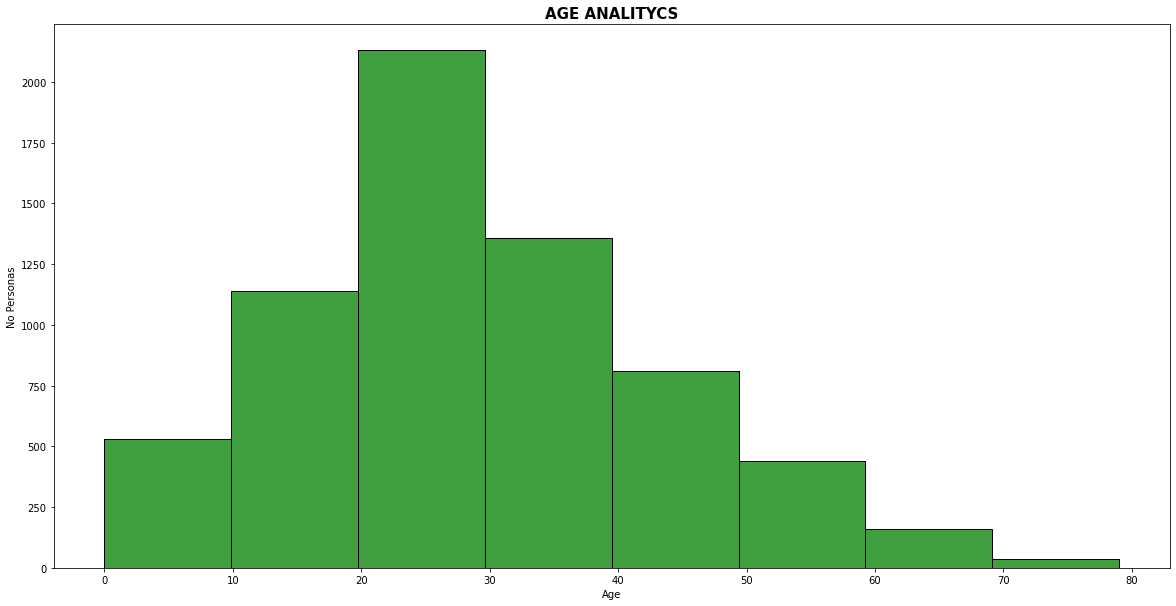

In [57]:
## VISULIZATION DATA

plt.figure(figsize=(20,10))
plt.title("AGE ANALITYCS",fontsize = 15, fontweight = "bold")
plt.ylabel("No Personas")
sns.histplot(data_clean,x="Age",bins=8,color="g")
plt.show()


<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

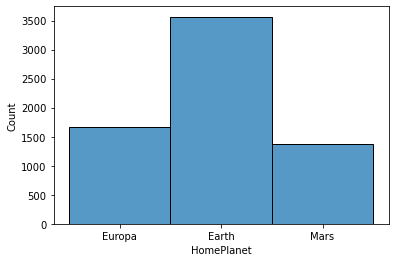

In [58]:

plt.figure(figsize=(20,10))
plt.title("AGE ANALITYCS",fontsize = 15, fontweight = "bold")
plt.ylabel("No Personas")
sns.histplot(data_clean,x="Age",bins=8,color="b")
plt.show()